In [ ]:
# SON - Praktiskais uzdevums
# Darbs ar JSON API
# Piemērs
# http://www.recipepuppy.com/api/?i=onions,garlic&q=omelet&p=3
# Optional Parameters:
# i : comma delimited ingredients
# q : normal search query
# p : page
# 1a. Izvelciet 10 receptes kas satur kartupeļus no sekojoša API:
# http://www.recipepuppy.com/about/api/
# Dati jasaglabā .json failā bet arī jaizveido python datu struktūra
# PS. ASV izrunā kartupeli kā potato :)
# 1b. Izvelciet 100 receptes, kas satur kartupeļus un sieru no tā paša API
# Atceramies ka šis API datus dod tikai pa 10 vērtībām reizē, līdz ar to vajadzēs lipināt rezultātus kopā.
# Lipināt būs vieglāk jau Python datu strukturu.
# 1c Python datu struktūrā pārvērtiet ingredients atslēgas vērtību uz sarakstu.
# Citiem vārdiem saskaldiet string ar sastāvdaļam -> uz list
# Saglabājiet .json failā jauno struktūru
# 1d Atrodied visvairāk izmantotos ingredients kopā ar kartupeļiem un sieru.
# Ieteikums: Varat izmantot counter update metodi
# Izdrukājiet TOP 3 sastāvdaļas šajās receptēs.
# 1.e uzzīmējiet histogrammu ar ingredients skaitu kuri tiek izmantoti kartupeļu un siera receptēs(100 receptēs).
# 1.f kā būtu ar sastāvdaļām omelet histogrammu ?
# Bonus, uztaisiet meklētāju, kurš paprasa lietotājam, kādu ēdienu meklēt
# Super bonuss būtu atrast kādu API kas ļauj tulkot latviski -> angliski, tad lietotājs ievadīt latviski bet receptes tiktu meklētas angliski.
# Tas būtu gala projekta vērts.



In [1]:
import time
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# 1a. Izvelciet 10 receptes kas satur kartupeļus no sekojoša API:
# http://www.recipepuppy.com/about/api/
# Dati jasaglabā .json failā bet arī jaizveido python datu struktūra
# PS. ASV izrunā kartupeli kā potato :)

In [2]:
# v1 result is list
url = "http://www.recipepuppy.com/api/?i=potato&p=1"
response = requests.get(url)
o_data = response.json()
o_recipes = o_data.get('results')
with open("potato1.json", mode="w") as write_file:
    json.dump(o_recipes, write_file)
# type(o_recipes)    
o_recipes

[{'title': 'Moroccan Spiced Roast Potatoes',
  'href': 'http://www.recipezaar.com/moroccan-spiced-roast-potatoes-377030',
  'ingredients': 'potato',
  'thumbnail': 'http://img.recipepuppy.com/507716.jpg'},
 {'title': 'French Potato Salad (Light)',
  'href': 'http://www.recipezaar.com/French-Potato-Salad-Light-315220',
  'ingredients': 'potato',
  'thumbnail': 'http://img.recipepuppy.com/575259.jpg'},
 {'title': 'Baked Potatoes from the Crock Pot',
  'href': 'http://www.recipezaar.com/Baked-Potatoes-from-the-Crock-Pot-53182',
  'ingredients': 'potato',
  'thumbnail': 'http://img.recipepuppy.com/36975.jpg'},
 {'title': 'Garlicky Olive Oil Potato Salad',
  'href': 'http://www.recipezaar.com/Garlicky-Olive-Oil-Potato-Salad-233788',
  'ingredients': 'potato',
  'thumbnail': 'http://img.recipepuppy.com/649845.jpg'},
 {'title': 'How To Strengthen Your Arms Recipe',
  'href': 'http://www.grouprecipes.com/65147/how-to-strengthen-your-arms.html',
  'ingredients': 'potato, potato, potato',
  'thu

In [3]:
# v2 result is dict
url = "http://www.recipepuppy.com/api/?i=potato&p=1"
response = requests.get(url)
o_data = response.json()
# o_recipes = o_data.get('results')
with open("potato_full.json", mode="w") as write_file:
    json.dump(o_data, write_file, indent=4)
# type(o_data)    

In [ ]:
# 1b. Izvelciet 100 receptes, kas satur kartupeļus un sieru no tā paša API
# Atceramies ka šis API datus dod tikai pa 10 vērtībām reizē, līdz ar to vajadzēs lipināt rezultātus kopā.
# Lipināt būs vieglāk jau Python datu strukturu.

In [4]:
# url = "http://www.recipepuppy.com/api/?i=onions,garlic&q=omelet&p=3"
full_recipes = []
for i in range(1,4): # only 30 because on bigger numbers server returns 'response '500'
    url = "http://www.recipepuppy.com/api/?i=potato,cheese&p="+str(i)
    response = requests.get(url)
    time.sleep(0.9)
    o_data = response.json()
    o_recipes = o_data.get('results')
    full_recipes.extend(o_recipes)

In [5]:
len(full_recipes)

30

In [6]:
full_recipes[:3]

[{'title': 'Cheesy Fries \r\n\t\t\r\n\t\r\n\t\t\r\n\t\r\n\t\t\r\n\t\r\n\t\r\n\r\n',
  'href': 'http://www.kraftfoods.com/kf/recipes/cheesy-fries-53601.aspx',
  'ingredients': 'cheese, potato',
  'thumbnail': 'http://img.recipepuppy.com/638886.jpg'},
 {'title': 'Cheesy Pizza Baked Potato \r\n\r\n',
  'href': 'http://www.kraftfoods.com/kf/recipes/cheesy-pizza-baked-potato-53917.aspx',
  'ingredients': 'cheese, potato, pizza sauce',
  'thumbnail': 'http://img.recipepuppy.com/638907.jpg'},
 {'title': 'Garlic-Herb Mashed Potatoes',
  'href': 'http://www.recipezaar.com/Garlic-Herb-Mashed-Potatoes-72981',
  'ingredients': 'cheese, milk, potato',
  'thumbnail': 'http://img.recipepuppy.com/648435.jpg'}]

In [ ]:
# len(o_recipes)

In [ ]:
# type(o_data)

In [ ]:
# 1c Python datu struktūrā pārvērtiet ingredients atslēgas vērtību uz sarakstu.
# Citiem vārdiem saskaldiet string ar sastāvdaļam -> uz list
# Saglabājiet .json failā jauno struktūru

In [ ]:
# ing =[]
# for i in range(1,len(full_recipes)):
#     ing.extend(full_recipes[i]['ingredients'])

In [7]:
ing_str =('')
# for i in range(0,len(full_recipes)):
for recipe in full_recipes:
    ing_str += (recipe['ingredients']) + ', '
ing_str[:100]

'cheese, potato, cheese, potato, pizza sauce, cheese, milk, potato, bologna, cheese, potato, cheese, '

In [8]:
words = ing_str.split(", ")
words[:10]

['cheese',
 'potato',
 'cheese',
 'potato',
 'pizza sauce',
 'cheese',
 'milk',
 'potato',
 'bologna',
 'cheese']

In [ ]:
# print(words)

In [9]:
with open("ing_str_int.json", mode="w") as write_file:
        json.dump(words, write_file, indent=4) 

In [ ]:
# 1d Atrodied visvairāk izmantotos ingredients kopā ar kartupeļiem un sieru.
# Ieteikums: Varat izmantot counter update metodi
# Izdrukājiet TOP 3 sastāvdaļas šajās receptēs.

In [10]:
from collections import Counter

In [11]:
wcount = Counter(words)
mc = wcount.most_common()
print(mc[:3])

[('cheese', 31), ('potato', 30), ('butter', 6)]


In [ ]:
# 1.e uzzīmējiet histogrammu ar ingredients skaitu kuri tiek izmantoti kartupeļu un siera receptēs(100 receptēs).

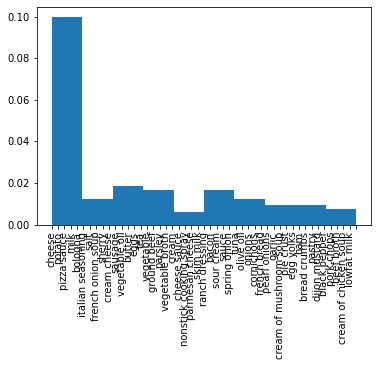

In [12]:
num_bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(words, num_bins, density=1)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

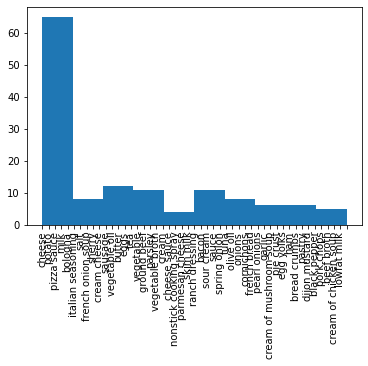

In [15]:
num_bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(words)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [14]:
bins

array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ])

In [ ]:
# 1.f kā būtu ar sastāvdaļām omelet histogrammu ?

In [24]:
omelet_recipes = []
for i in range(1,10):
    url = "http://www.recipepuppy.com/api/?i=onions&q=omelet&p="+str(i)
    print(f"Requesting data from {url}")
    response = requests.get(url)
    time.sleep(0.5)
    om_data = response.json()
    om_recipes = om_data.get('results')
    omelet_recipes.extend(om_recipes)
omelet_recipes[:5]

Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=1
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=2
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=3
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=4
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=5
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=6
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=7
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=8
Requesting data from http://www.recipepuppy.com/api/?i=onions&q=omelet&p=9


[{'title': 'Greek Omelet for 1',
  'href': 'http://www.recipezaar.com/Greek-Omelet-for-1-235396',
  'ingredients': 'butter, egg substitute, onions, black pepper, feta cheese, salt, spinach, tomato, water',
  'thumbnail': 'http://img.recipepuppy.com/694441.jpg'},
 {'title': 'Healthy Omelet on the Run',
  'href': 'http://www.recipezaar.com/healthy-omelet-on-the-run-371159',
  'ingredients': 'egg whites, cheese, mushroom, onions, black pepper, spinach',
  'thumbnail': 'http://img.recipepuppy.com/622057.jpg'},
 {'title': 'Italian Omelet \r\n\t\t\n',
  'href': 'http://www.kraftfoods.com/kf/recipes/italian-omelet-57594.aspx',
  'ingredients': 'onions, turkey sausage, eggs',
  'thumbnail': 'http://img.recipepuppy.com/600098.jpg'},
 {'title': 'Eggplant Omelet',
  'href': 'http://www.recipezaar.com/Eggplant-Omelet-322870',
  'ingredients': 'eggplant, eggs, olive oil, onions, black pepper, salt, tomato',
  'thumbnail': 'http://img.recipepuppy.com/538011.jpg'},
 {'title': 'Oven Omelet',
  'href':

In [22]:
omelet_recipes[:5]

[{'title': 'Garlic Potato',
  'href': 'http://www.recipezaar.com/Garlic-Potato-166799',
  'ingredients': 'butter, cheese, cream, garlic, potato',
  'thumbnail': 'http://img.recipepuppy.com/645569.jpg'},
 {'title': 'Cheezey Potatoes Recipe',
  'href': 'http://www.grouprecipes.com/81680/cheezey-potatoes.html',
  'ingredients': 'butter, cheese, cream of mushroom soup, potato, sour cream',
  'thumbnail': 'http://img.recipepuppy.com/167952.jpg'},
 {'title': 'Hamburger Pie Recipe',
  'href': 'http://www.grouprecipes.com/84422/hamburger-pie.html',
  'ingredients': 'potato, ground beef, cheese, cheese, onions, pie crust',
  'thumbnail': 'http://img.recipepuppy.com/244762.jpg'},
 {'title': 'Roasted Potatoes With Bacon And Cheese Recipe',
  'href': 'http://www.grouprecipes.com/39188/roasted-potatoes-with-bacon-and-cheese.html',
  'ingredients': 'bacon, cheese, ranch dressing, potato, parsley',
  'thumbnail': 'http://img.recipepuppy.com/406832.jpg'},
 {'title': 'Ham and cheese potato cakes',
  'h

In [25]:
oing_str =('')
for i in range(0,len(omelet_recipes)):
    oing_str += (omelet_recipes[i]['ingredients']) + ', '
ingr = oing_str.split(", ")  

In [26]:
with open("ing_omelet.json", mode="w") as write_file:
        json.dump(ingr, write_file, indent=4) 

In [27]:
icount = Counter(ingr)
mc = icount.most_common()
print(mc[:3])

[('onions', 90), ('eggs', 80), ('salt', 51)]


In [28]:
icount.most_common(10)

[('onions', 90),
 ('eggs', 80),
 ('salt', 51),
 ('black pepper', 35),
 ('green pepper', 35),
 ('potato', 31),
 ('cheddar cheese', 27),
 ('butter', 21),
 ('bacon', 19),
 ('olive oil', 18)]

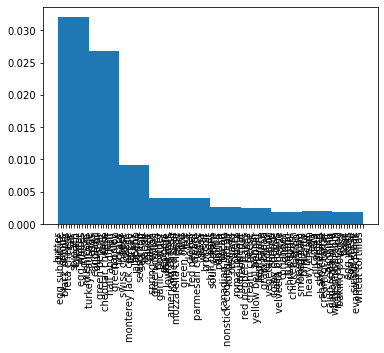

In [29]:
num_bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(ingr, num_bins, density=1)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [ ]:
# Bonus, uztaisiet meklētāju, kurš paprasa lietotājam, kādu ēdienu meklēt

In [ ]:
q = input('Please input desired recipe: ')

In [ ]:
i = input('Please input your ingridients (comma separated): ')

In [ ]:
r = input('Please input how many recipes to return (max 10): ')

In [ ]:
url = "http://www.recipepuppy.com/api/?i=" + i +"&q=" + q +"&p=1"
response = requests.get(url)
o_data = response.json()
o_recipes = o_data.get('results')

In [ ]:
# print(url)

In [ ]:
print(o_recipes[:int(r)])